**10주차 실습 - 차원 축소의 시각화**

# 1. 20 뉴스그룹 데이터 준비

- 데이터셋 설명: http://qwone.com/~jason/20Newsgroups/
- scikit-learn 라이브러리: http://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space',
              'comp.sys.ibm.pc.hardware', 'sci.crypt']

# categories = ['alt.atheism', 'sci.space', 'comp.sys.ibm.pc.hardware']

# 20 Newsgroups 데이터셋 로드
newsgroups = fetch_20newsgroups(categories=categories, shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

In [2]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.sys.ibm.pc.hardware',
 'sci.crypt',
 'sci.space',
 'talk.religion.misc']

In [3]:
len(newsgroups.data)

3219

# 2. TF-IDF 행렬 변환

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer 생성
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, max_features=1000)

# 문서를 TF-IDF 행렬로 변환
tfidf_matrix = vectorizer.fit_transform(newsgroups.data)

In [5]:
tfidf_matrix.shape

(3219, 1000)

In [6]:
tfidf_matrix[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

# 3. LSA 실행

In [7]:
from sklearn.decomposition import TruncatedSVD

num_topics = 6  # 토픽 수

# Truncated SVD (LSA) 수행
lsa = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# 피처와 연관된 용어(단어) 얻기
terms = vectorizer.get_feature_names_out()

In [8]:
lsa_matrix.shape

(3219, 6)

In [9]:
lsa_matrix[0]

array([ 0.16590928, -0.09624115, -0.06893864, -0.041046  ,  0.00102686,
       -0.06826118])

# 4. 차원 축소의 시각화

In [10]:
# LSA 기반으로 문서에 토픽 할당
def assign_topics(topic_matrix, num_topics):
    return np.argmax(topic_matrix, axis=1) + 1

newsgroups['lsa_topic'] = assign_topics(lsa_matrix, num_topics)

df = pd.DataFrame({'dim1': lsa_matrix[:, 0], 'dim2': lsa_matrix[:, 1], 'dim3': lsa_matrix[:, 2], 'lsa': newsgroups['lsa_topic']})
df

,dim1,dim2,dim3,lsa
0,0.165909,-0.096241,-0.068939,1
1,0.033028,-0.026914,-0.015617,1
2,0.137656,0.129910,-0.030599,1
3,0.115552,-0.034825,-0.015425,1
4,0.158986,-0.225970,-0.181800,6
...,...,...,...,...
3214,0.239597,-0.038997,0.305836,3
3215,0.232248,-0.002925,-0.047014,1
3216,0.147238,-0.023421,0.097600,1
3217,0.161611,0.065678,-0.016237,1


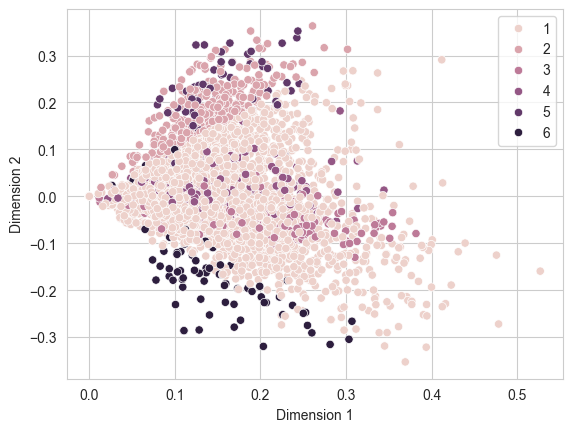

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='dim1', y='dim2', marker='o', hue='lsa', data=df)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.legend()
plt.grid(True)
plt.show()


<Figure size 600x600 with 0 Axes>

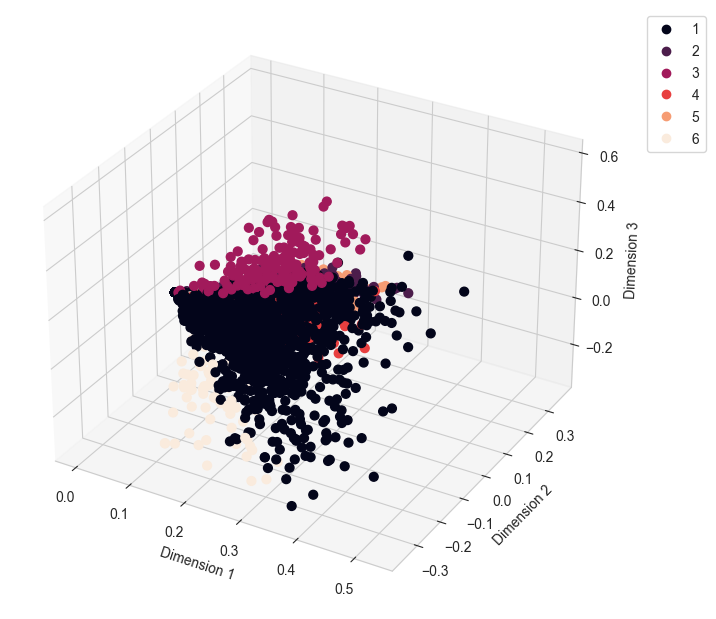

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = df['dim1']
y = df['dim2']
z = df['dim3']

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(x, y, z, s=40, c=df['lsa'], marker='o', alpha=1)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()